# Import Libraries

In [357]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Understanding the Data

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

The **CO2 EMISSIONS (g/km)** column is the dependent column, and the rest are the independent columns.

In [358]:
df = pd.read_csv("FuelConsumptionCo2.csv")

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [359]:
print(f'The shape of the data frame : {df.shape}')

The shape of the data frame : (1067, 13)


In [360]:
df.describe(include='all')

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067,1067,1067,1067.000000,1067.000000,1067,1067,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
unique,NaN,39,663,16,NaN,NaN,22,4,NaN,NaN,NaN,NaN,NaN
top,NaN,FORD,F150 FFV,MID-SIZE,NaN,NaN,A6,X,NaN,NaN,NaN,NaN,NaN
freq,NaN,90,8,178,NaN,NaN,222,514,NaN,NaN,NaN,NaN,NaN
mean,2014.0,NaN,NaN,NaN,3.346298,5.794752,NaN,NaN,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,NaN,NaN,NaN,1.415895,1.797447,NaN,NaN,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,NaN,NaN,NaN,3.400000,6.000000,NaN,NaN,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,NaN,NaN,NaN,4.300000,8.000000,NaN,NaN,15.550000,10.850000,13.350000,31.000000,294.000000


In [361]:
df.isna().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [362]:
df.duplicated().sum()

0

In [363]:
df = df[
    ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY',
     'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']
]

df

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,24,271
1063,3.2,6,13.2,9.5,11.5,25,264
1064,3.0,6,13.4,9.8,11.8,24,271
1065,3.2,6,12.9,9.3,11.3,25,260


# Exercise 1 : Histogram

Plot a Histogram for the following columns :-

1. CO2EMISSIONS
2. CYLINDERS
3. ENGINESIZE
4. FUELCONSUMPTION_COMB
5. FUELCONSUMPTION_CITY
6. FUELCONSUMPTION_HWY
7. FUELCONSUMPTION_COMB_MPG

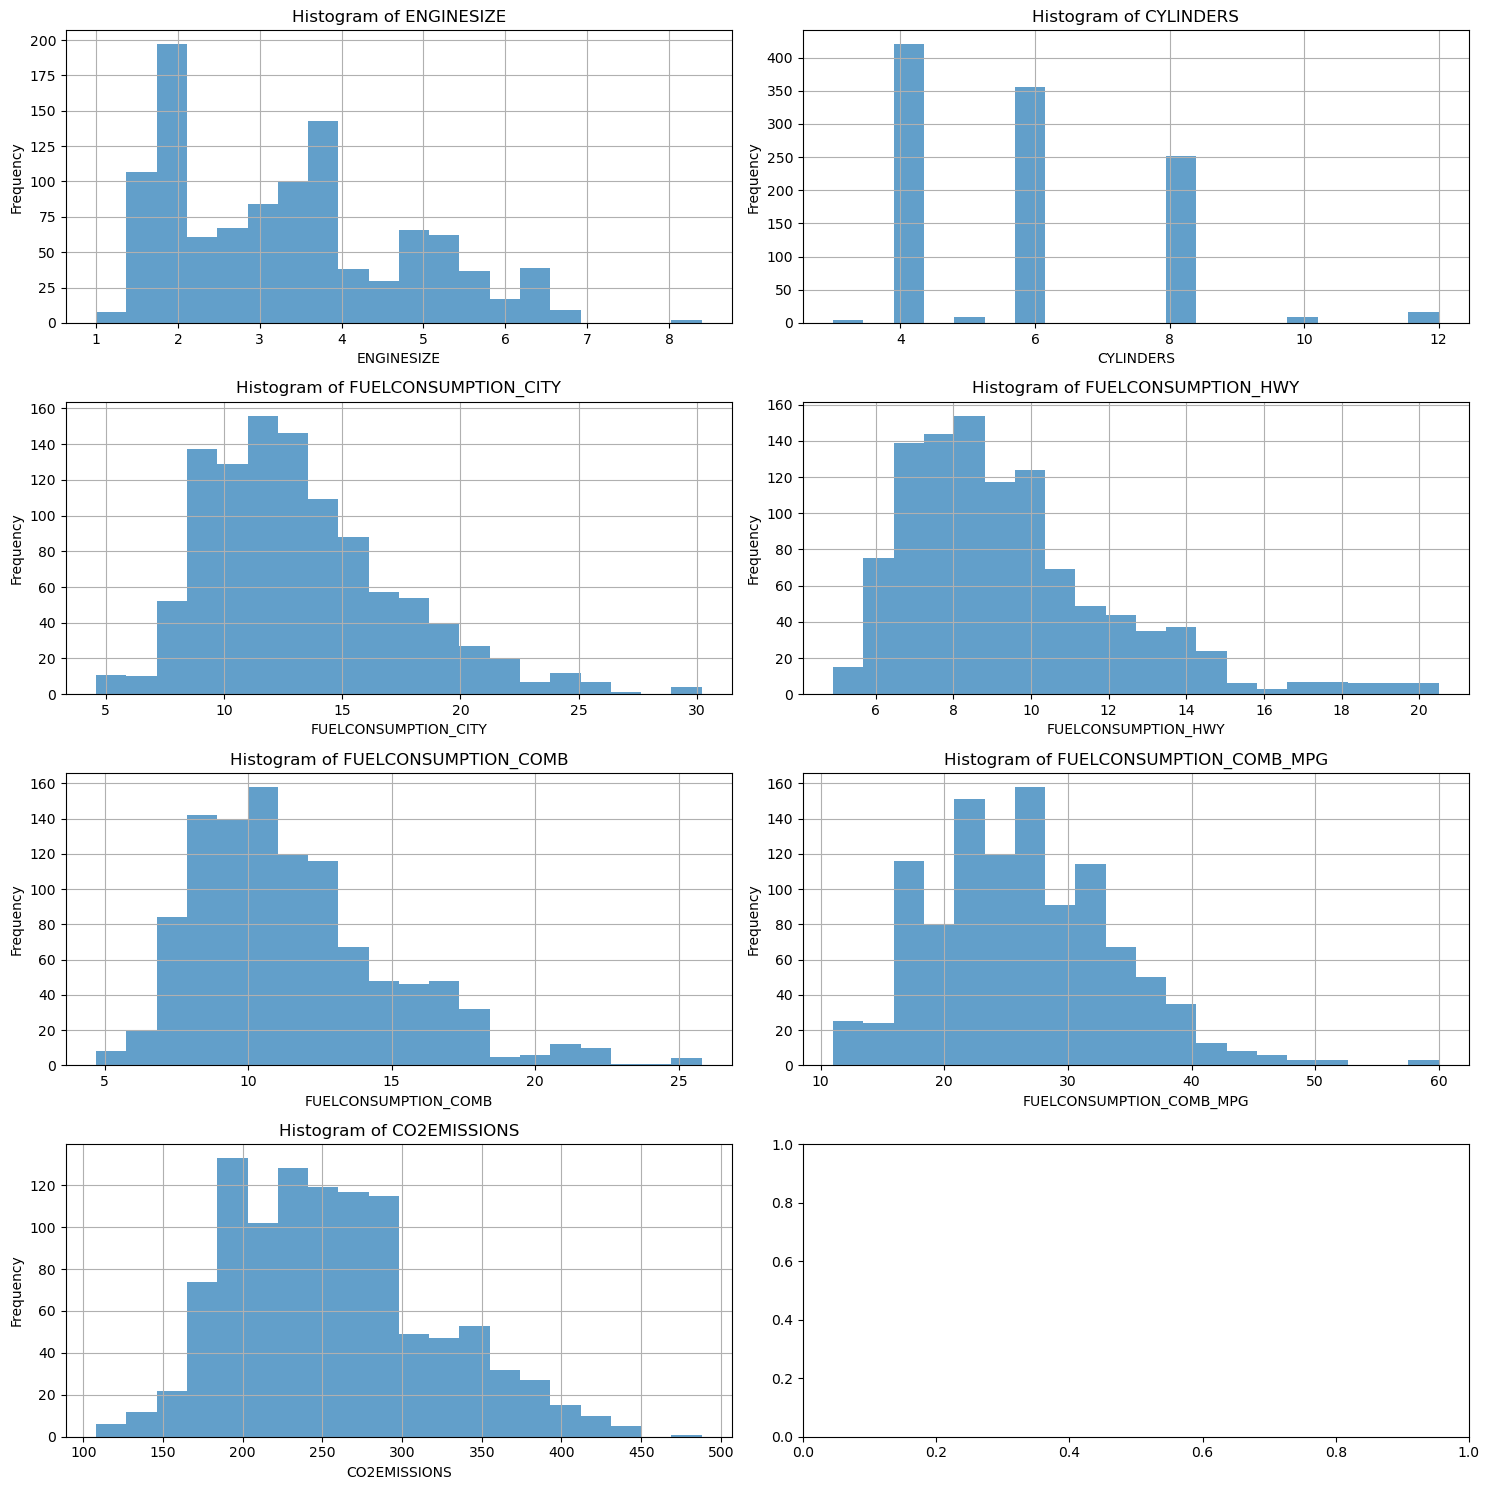

In [364]:
fig, axes = plt.subplots(4, 2, figsize=(15, 15))  

for i, column in enumerate(df.columns):
    ax = axes[i // 2, i % 2] if 4 > 1 else axes[i % 2]
    ax.hist(df[column], bins=20, alpha=0.7)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {column}')
    ax.grid(True)

plt.tight_layout()
plt.show()

# Exercise 2 : Scatter Plots

Plot 6 scatter plots, the 6 X features with CO2EMISSIONS.

In [365]:
X_columns = ['ENGINESIZE', 'FUELCONSUMPTION_CITY', 
     'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG','FUELCONSUMPTION_HWY','CYLINDERS']

Y_columns = ['CO2EMISSIONS']

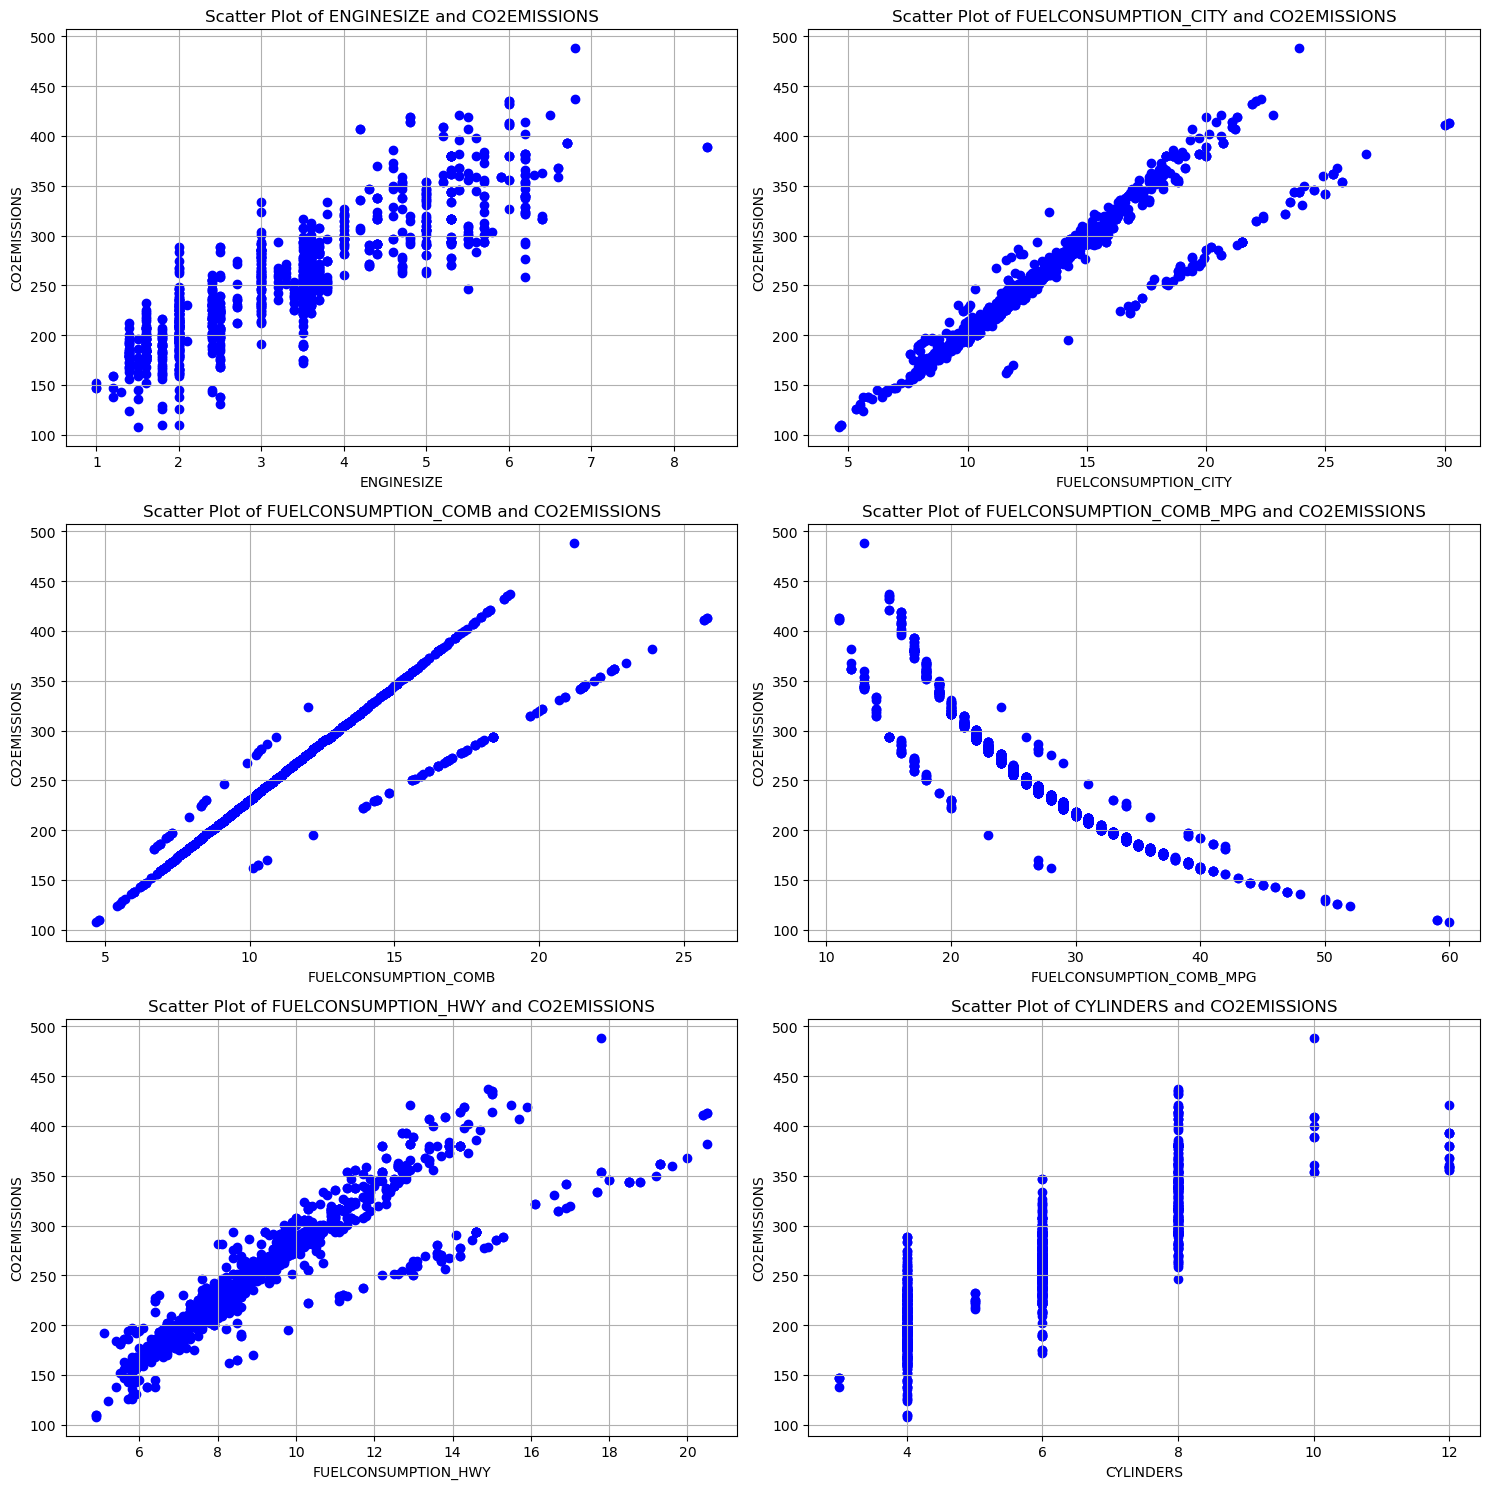

In [366]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))  

for i, column in enumerate(X_columns):
    ax = axes[i // 2, i % 2] if 4 > 1 else axes[i % 2]
    ax.scatter(df[column], df['CO2EMISSIONS'], color='blue', marker='o')
    ax.set_xlabel(column)
    ax.set_ylabel('CO2EMISSIONS')
    ax.set_title(f'Scatter Plot of {column} and CO2EMISSIONS')
    ax.grid(True)

plt.tight_layout()
plt.show()

# Exercise 3 : Box Plots

Plot 6 box plots for :-
1. CYLINDERS
2. ENGINESIZE
3. FUELCONSUMPTION_COMB
4. FUELCONSUMPTION_CITY
5. FUELCONSUMPTION_HWY
6. FUELCONSUMPTION_COMB_MPG

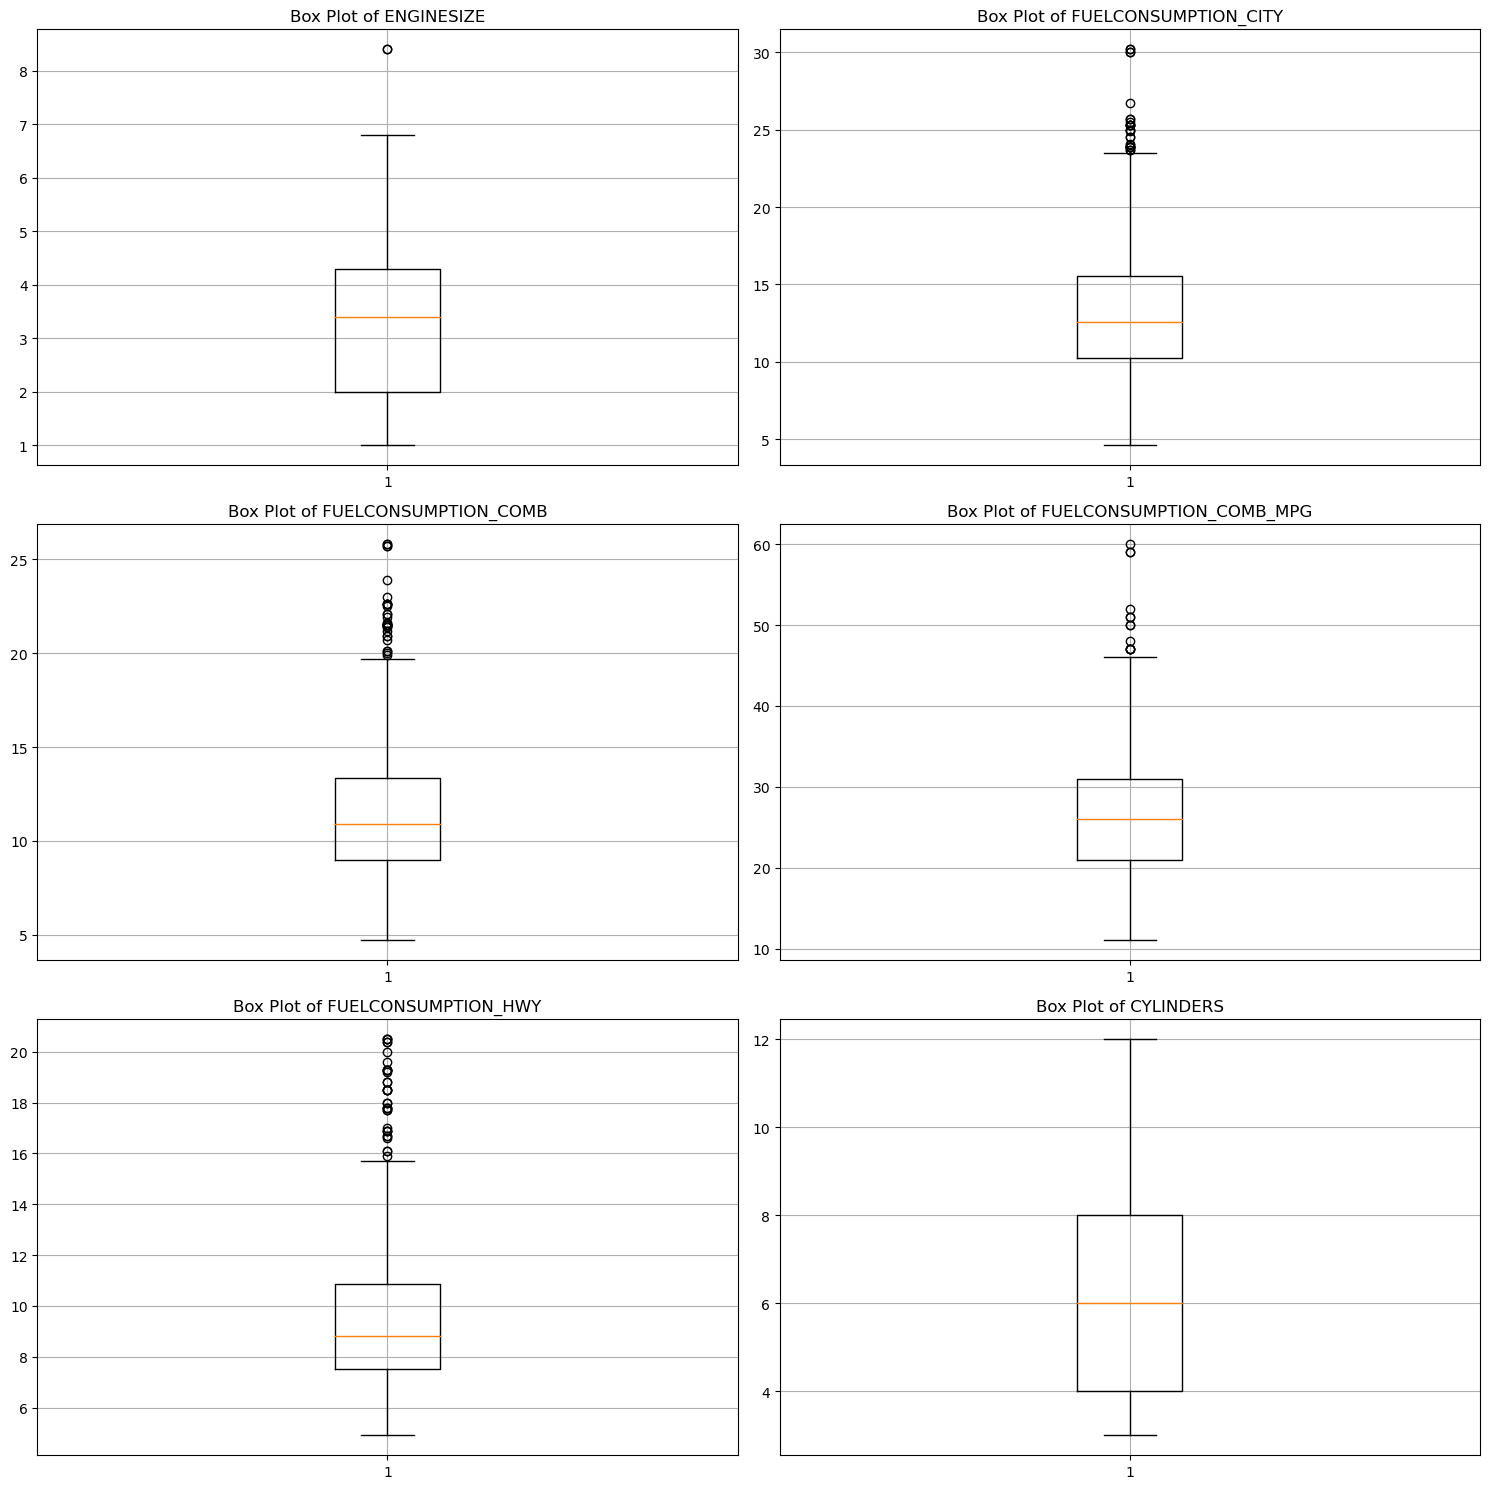

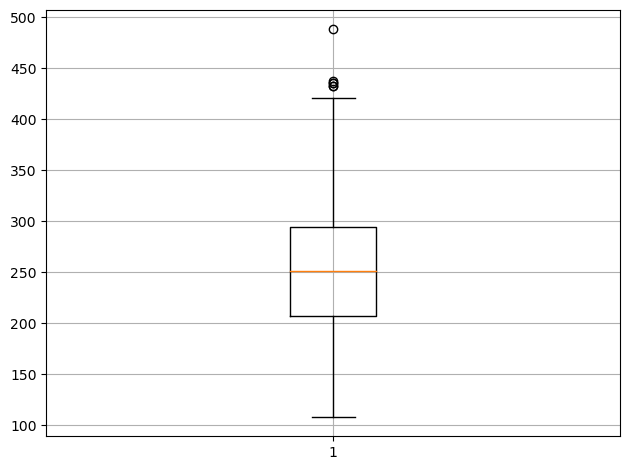

In [367]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))  
for i, column in enumerate(X_columns):
    ax = axes[i // 2, i % 2] if 4 > 1 else axes[i % 2]
    ax.boxplot(df[column])
    ax.set_title(f'Box Plot of {column}')
    ax.grid(True)

plt.tight_layout()
plt.show()

plt.boxplot(df['CO2EMISSIONS'])
plt.grid(True)

plt.tight_layout()
plt.show()

# Exercise 4 : Remove Outliers

Then plot a box plot to check if the outliers was removed or not.

In [368]:
def get_bounds(col):
    Q1 = np.nanpercentile(col, 25)
    Q3 = np.nanpercentile(col, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound


for column in X_columns:
    lower_bound, upper_bound = get_bounds(df[column])
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

lower_bound, upper_bound = get_bounds(df['CO2EMISSIONS'])
df = df[(df['CO2EMISSIONS'] >= lower_bound) & (df['CO2EMISSIONS'] <= upper_bound)]

for column in X_columns:
    lower_bound, upper_bound = get_bounds(df[column])
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

lower_bound, upper_bound = get_bounds(df['CO2EMISSIONS'])

df = df[(df['CO2EMISSIONS'] >= lower_bound) & (df['CO2EMISSIONS'] <= upper_bound)]

for column in X_columns:
    lower_bound, upper_bound = get_bounds(df[column])
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

lower_bound, upper_bound = get_bounds(df['CO2EMISSIONS'])
df = df[(df['CO2EMISSIONS'] >= lower_bound) & (df['CO2EMISSIONS'] <= upper_bound)]


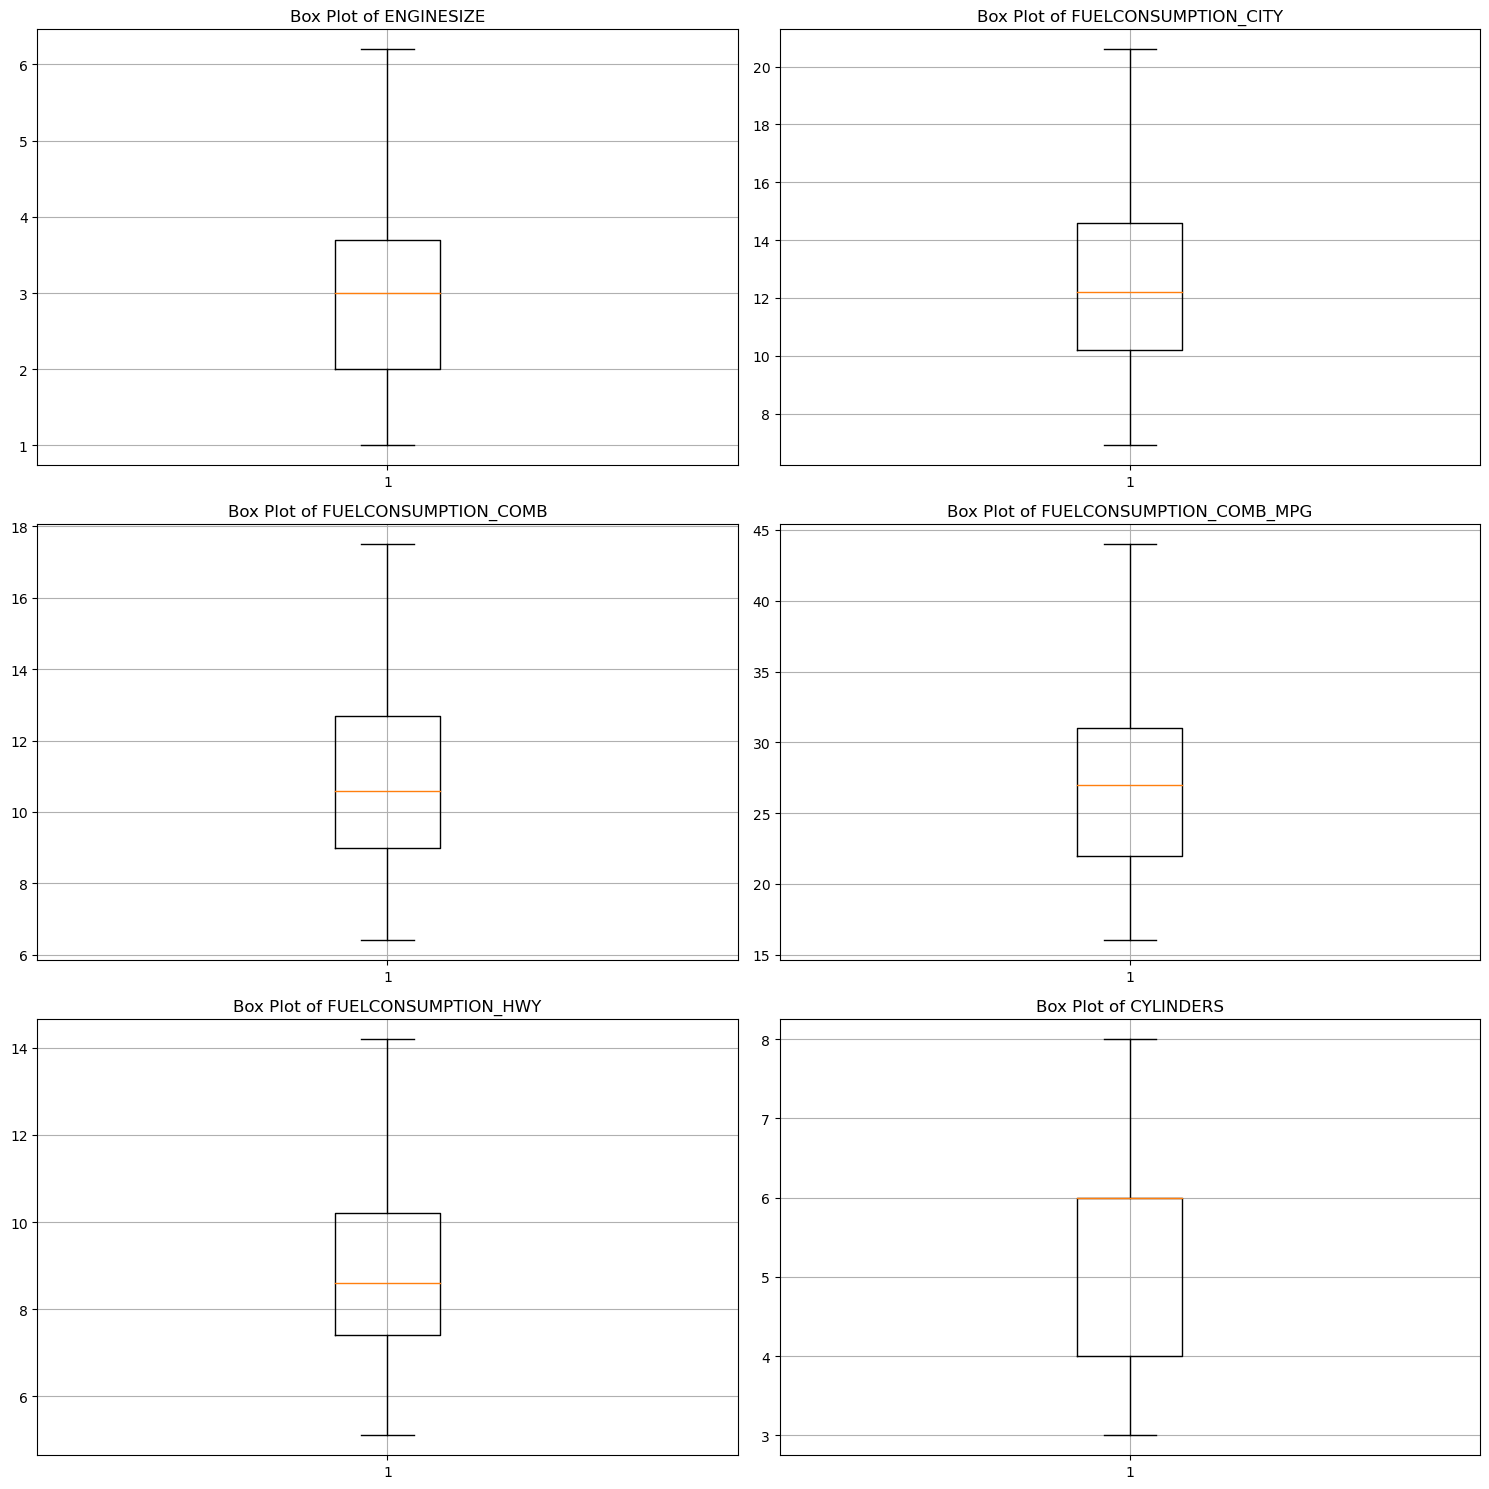

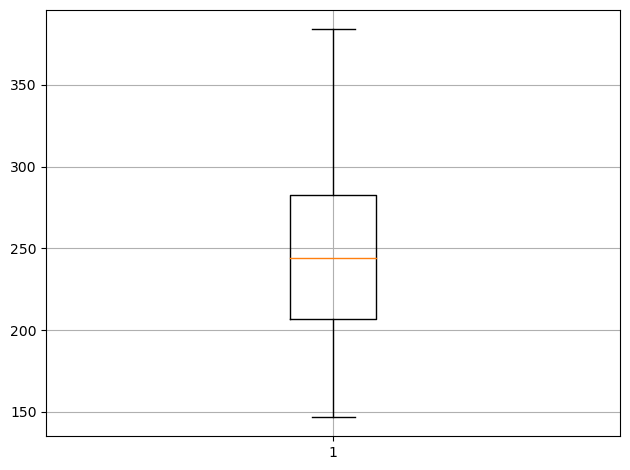

In [369]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))  
for i, column in enumerate(X_columns):
    ax = axes[i // 2, i % 2] if 4 > 1 else axes[i % 2]
    ax.boxplot(df[column])
    ax.set_title(f'Box Plot of {column}')
    ax.grid(True)

plt.tight_layout()
plt.show()

plt.boxplot(df['CO2EMISSIONS'])
plt.grid(True)

plt.tight_layout()
plt.show()

# Exercise 5 : Train and Test Split

Split the features in X variable and target in the Y variable.

Then use train_test_split method to split the dataset into train and test sets.

The test set have 20% of the dataset and the random state is 42.

In [370]:
from sklearn.model_selection import train_test_split

X_columns = ['ENGINESIZE', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY',
     'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CYLINDERS']

Y_columns = ['CO2EMISSIONS']

X = df[X_columns]
Y = df[Y_columns]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Exercise 4 : Simple Linear Regression.

Train a simple linear regression

X = Engine Size.
Y = Emission.

What is the coefficients and y intercept?

In [371]:
X = df['ENGINESIZE'].values
y = df['CO2EMISSIONS'].values
linear_regression_model = LinearRegression()

linear_regression_model.fit(X.reshape(-1, 1), y)

wight = linear_regression_model.coef_
bias = linear_regression_model.intercept_
print(wight, bias)

[36.05022591] 134.2231095051388


# Exercise 5 : Plot the Output

Plot linear regression model (output).

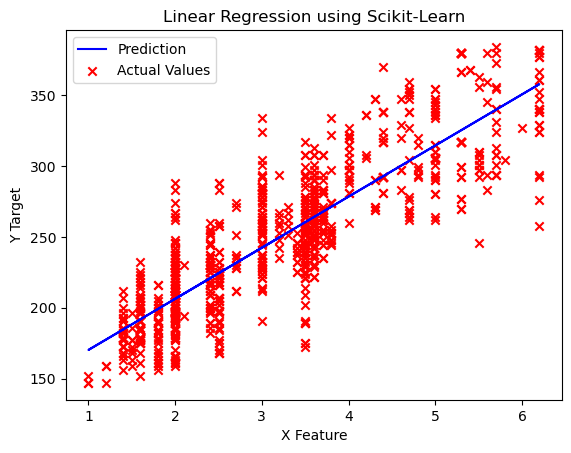

In [372]:
def find_y(x, beta, b):
    y = []
    for xi in x:
        y.append(xi * beta + b)
    return np.array(y)

y_pred = find_y(X, wight[0], bias)

plt.plot(X, y_pred, c='b',label='Prediction')
plt.scatter(X, y, marker='x', c='r',label='Actual Values')
 
plt.title("Linear Regression using Scikit-Learn")

plt.ylabel('Y Target')
plt.xlabel('X Feature')
plt.legend()

plt.show();

# Exercise 6 : Evaluation

Evaluate the model using MSE, RMSE, MAE, and R^2.

In [373]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import math

print(f'MSE  : {mean_squared_error(y, y_pred)}')
print(f'RMSE : {math.sqrt(mean_squared_error(y, y_pred))}')
print(f'MAE  : {mean_absolute_error(y, y_pred)}')
print(f'R^2  : {r2_score(y, y_pred)}')

list_eval = [('ENGINESIZE',r2_score(y, y_pred))]

MSE  : 708.2881630152551
RMSE : 26.61368375507711
MAE  : 20.72770239587479
R^2  : 0.7440028916498374


# Exercise 7 : Repeat 4, 5, and 6

Repeat the steps 4, 5, and 6.

For the rest features (CYLINDERS, FUELCONSUMPTION_COMB, FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY) and then sort the models based on the best performance.

Note : Do not train the FUELCONSUMPTION_COMB_MPG.

[29.27331736] 85.93869023579481


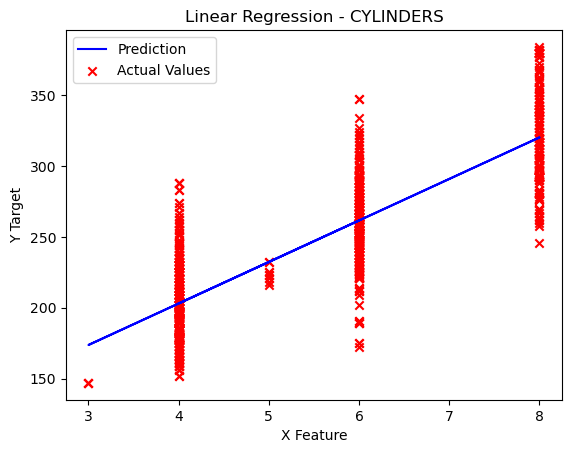

MSE  : 806.5885180310667
RMSE : 28.400502073573747
MAE  : 22.583623164698256
R^2  : 0.7084741225021025


In [374]:
# CYLINDERS
X = df['CYLINDERS'].values
y = df['CO2EMISSIONS'].values
linear_regression_model = LinearRegression()

linear_regression_model.fit(X.reshape(-1, 1), y)

wight = linear_regression_model.coef_
bias = linear_regression_model.intercept_
print(wight, bias)

y_pred = find_y(X, wight[0], bias)

plt.plot(X, y_pred, c='b',label='Prediction')
plt.scatter(X, y, marker='x', c='r',label='Actual Values')
 
plt.title("Linear Regression - CYLINDERS")

plt.ylabel('Y Target')
plt.xlabel('X Feature')
plt.legend()

plt.show()

print(f'MSE  : {mean_squared_error(y, y_pred)}')
print(f'RMSE : {math.sqrt(mean_squared_error(y, y_pred))}')
print(f'MAE  : {mean_absolute_error(y, y_pred)}')
print(f'R^2  : {r2_score(y, y_pred)}')

list_eval.append(('CYLINDERS',r2_score(y, y_pred)))

[19.10856631] 38.648594237903126


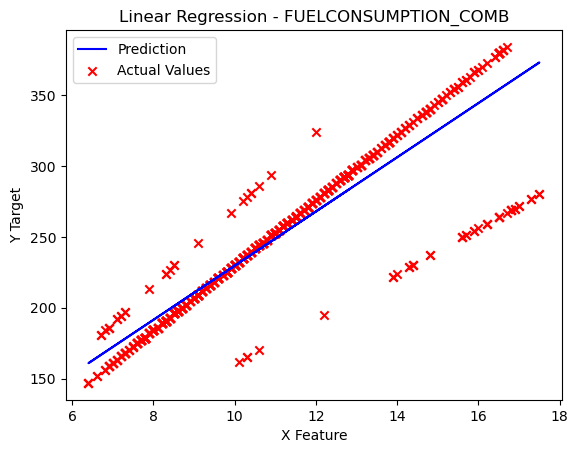

MSE  : 452.1046669308033
RMSE : 21.26275304213458
MAE  : 11.796832026471964
R^2  : 0.8365954798493416


In [375]:
# FUELCONSUMPTION_COMB
X = df['FUELCONSUMPTION_COMB'].values
y = df['CO2EMISSIONS'].values
linear_regression_model = LinearRegression()

linear_regression_model.fit(X.reshape(-1, 1), y)

wight = linear_regression_model.coef_
bias = linear_regression_model.intercept_
print(wight, bias)

y_pred = find_y(X, wight[0], bias)

plt.plot(X, y_pred, c='b',label='Prediction')
plt.scatter(X, y, marker='x', c='r',label='Actual Values')
 
plt.title("Linear Regression - FUELCONSUMPTION_COMB")

plt.ylabel('Y Target')
plt.xlabel('X Feature')
plt.legend()

plt.show()

print(f'MSE  : {mean_squared_error(y, y_pred)}')
print(f'RMSE : {math.sqrt(mean_squared_error(y, y_pred))}')
print(f'MAE  : {mean_absolute_error(y, y_pred)}')
print(f'R^2  : {r2_score(y, y_pred)}')

list_eval.append(('FUELCONSUMPTION_COMB',r2_score(y, y_pred)))

[15.98990623] 46.81419211742272


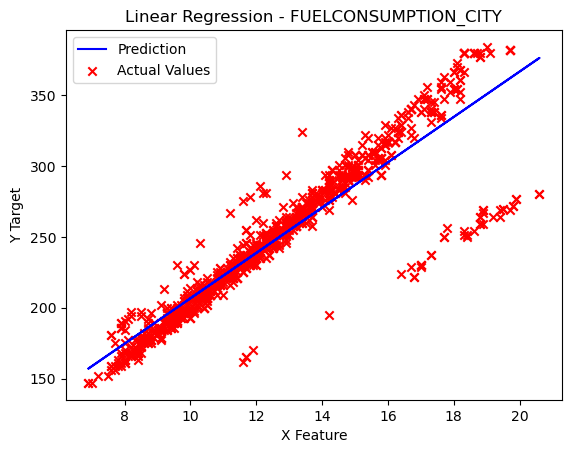

MSE  : 479.3138838136284
RMSE : 21.89323831263042
MAE  : 12.47189269038936
R^2  : 0.8267612327078633


In [376]:
# FUELCONSUMPTION_CITY
X = df['FUELCONSUMPTION_CITY'].to_numpy()
y = df['CO2EMISSIONS'].to_numpy()
linear_regression_model = LinearRegression()

linear_regression_model.fit(X.reshape(-1, 1), y)

wight = linear_regression_model.coef_
bias = linear_regression_model.intercept_
print(wight, bias)

y_pred = find_y(X, wight[0], bias)

plt.plot(X, y_pred, c='b',label='Prediction')
plt.scatter(X, y, marker='x', c='r',label='Actual Values')
 
plt.title("Linear Regression - FUELCONSUMPTION_CITY")

plt.ylabel('Y Target')
plt.xlabel('X Feature')
plt.legend()

plt.show()

print(f'MSE  : {mean_squared_error(y, y_pred)}')
print(f'RMSE : {math.sqrt(mean_squared_error(y, y_pred))}')
print(f'MAE  : {mean_absolute_error(y, y_pred)}')
print(f'R^2  : {r2_score(y, y_pred)}')

list_eval.append(('FUELCONSUMPTION_CITY',r2_score(y, y_pred)))

[23.5464572] 37.02082636492278


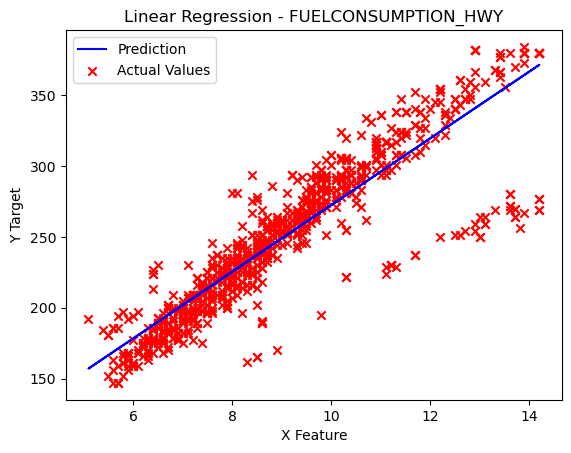

MSE  : 545.9940347712538
RMSE : 23.366515246635597
MAE  : 15.437599904828017
R^2  : 0.8026609770197886


In [377]:
# FUELCONSUMPTION_HWY
X = df['FUELCONSUMPTION_HWY'].to_numpy()
y = df['CO2EMISSIONS'].to_numpy()
linear_regression_model = LinearRegression()

linear_regression_model.fit(X.reshape(-1, 1), y)

wight = linear_regression_model.coef_
bias = linear_regression_model.intercept_
print(wight, bias)

y_pred = find_y(X, wight[0], bias)

plt.plot(X, y_pred, c='b',label='Prediction')
plt.scatter(X, y, marker='x', c='r',label='Actual Values')
 
plt.title("Linear Regression - FUELCONSUMPTION_HWY")

plt.ylabel('Y Target')
plt.xlabel('X Feature')
plt.legend()

plt.show()

print(f'MSE  : {mean_squared_error(y, y_pred)}')
print(f'RMSE : {math.sqrt(mean_squared_error(y, y_pred))}')
print(f'MAE  : {mean_absolute_error(y, y_pred)}')
print(f'R^2  : {r2_score(y, y_pred)}')

list_eval.append(('FUELCONSUMPTION_HWY',r2_score(y, y_pred)))

In [378]:
sorted_data = sorted(list_eval, key=lambda x: x[1], reverse=True)  # Sorting by the second element (Y)

print("Best models sorted by R^2 score:")
print(sorted_data)

Best models sorted by R^2 score:
[('FUELCONSUMPTION_COMB', 0.8365954798493416), ('FUELCONSUMPTION_CITY', 0.8267612327078633), ('FUELCONSUMPTION_HWY', 0.8026609770197886), ('ENGINESIZE', 0.7440028916498374), ('CYLINDERS', 0.7084741225021025)]


# Exercise 8 : Multiple Linear Regression

Train one linear regression model with the following features :-

1. CYLINDERS
2. ENGINESIZE
3. FUELCONSUMPTION_COMB
4. FUELCONSUMPTION_CITY
5. FUELCONSUMPTION_HWY


In [379]:
X = df.copy()
X = df.drop(columns=['CO2EMISSIONS','FUELCONSUMPTION_COMB_MPG'])
Y = df['CO2EMISSIONS'].to_numpy()

multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(X, Y)

wights = multiple_linear_regression.coef_
intercept = multiple_linear_regression.intercept_

print(f'The wights of the model      : {wights}')
print(f'The Y-intercept of the model : {intercept}')

y_hat = 0
for i, column in enumerate(X.columns):
    y_hat+= wights[i] * X[column]
y_hat+=intercept
y_hat = y_hat.to_numpy()

print(f'MSE  : {mean_squared_error(Y, y_hat)}')
print(f'RMSE : {math.sqrt(mean_squared_error(Y, y_hat))}')
print(f'MAE  : {mean_absolute_error(Y, y_hat)}')
print(f'R^2  : {r2_score(Y, y_hat)}')

The wights of the model      : [  8.01749309   6.12195744 -13.33213463  -4.32991012  31.94074194]
The Y-intercept of the model : 45.44335260049377
MSE  : 345.59481859851144
RMSE : 18.590180703761636
MAE  : 11.852936740873092
R^2  : 0.8750914121656549
